#**Welcome to Phone Detection using YOLOv8**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/Phone_Yolov8
%cd /content/drive/MyDrive/Phone_Yolov8

mkdir: cannot create directory ‘/content/drive/MyDrive/Phone_Yolov8’: File exists
/content/drive/MyDrive/Phone_Yolov8


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Phone_Yolov8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Dataset 

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="VngFalu4Z7idhaRWO5jA")
project = rf.workspace("mobile-phones").project("merged_dataset2")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/drive/MyDrive/Phone_Yolov8/datasets’: File exists
/content/drive/MyDrive/Phone_Yolov8/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Merged_Dataset2-1 in yolov8:: 100%|██████████| 9914/9914 [27:00<00:00,  6.12it/s] 


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/data.yaml epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/Phone_Yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					   train_batch2.jpg
confusion_matrix.png				   train_batch4215.jpg
events.out.tfevents.1684567795.dcf57ea48314.875.0  train_batch4216.jpg
F1_curve.png					   train_batch4217.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


/content/drive/MyDrive/Phone_Yolov8


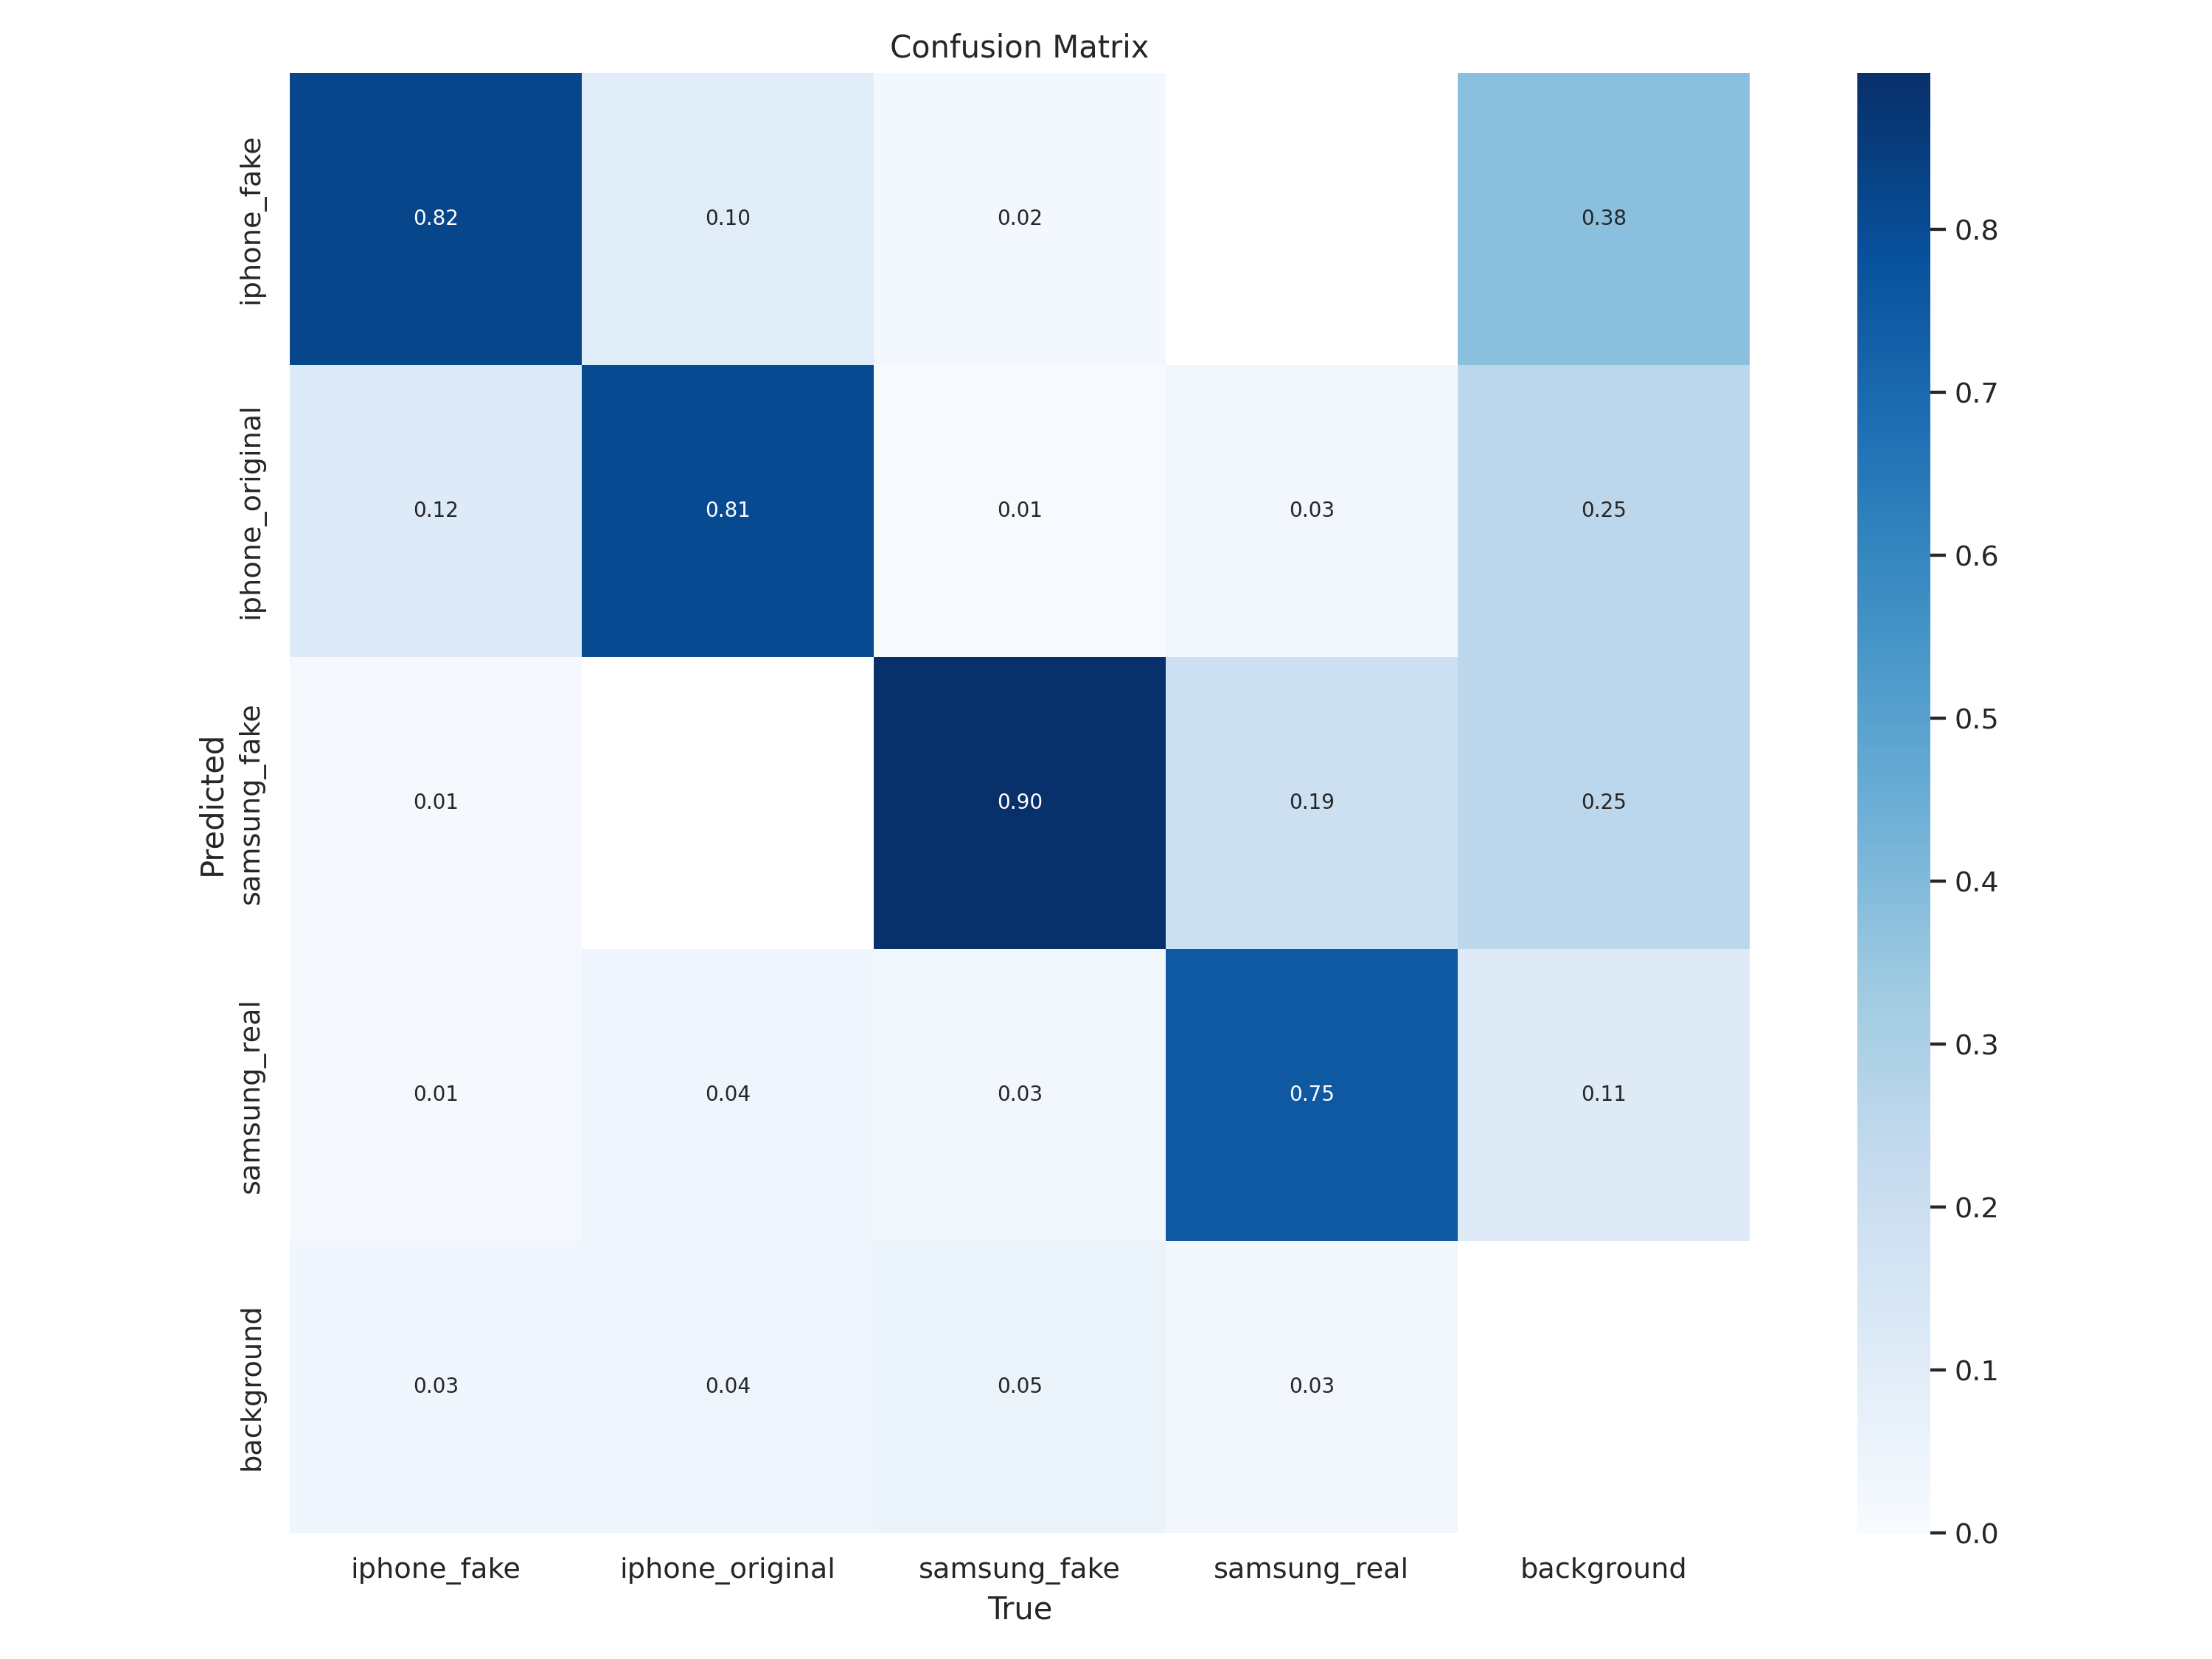

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content/drive/MyDrive/Phone_Yolov8


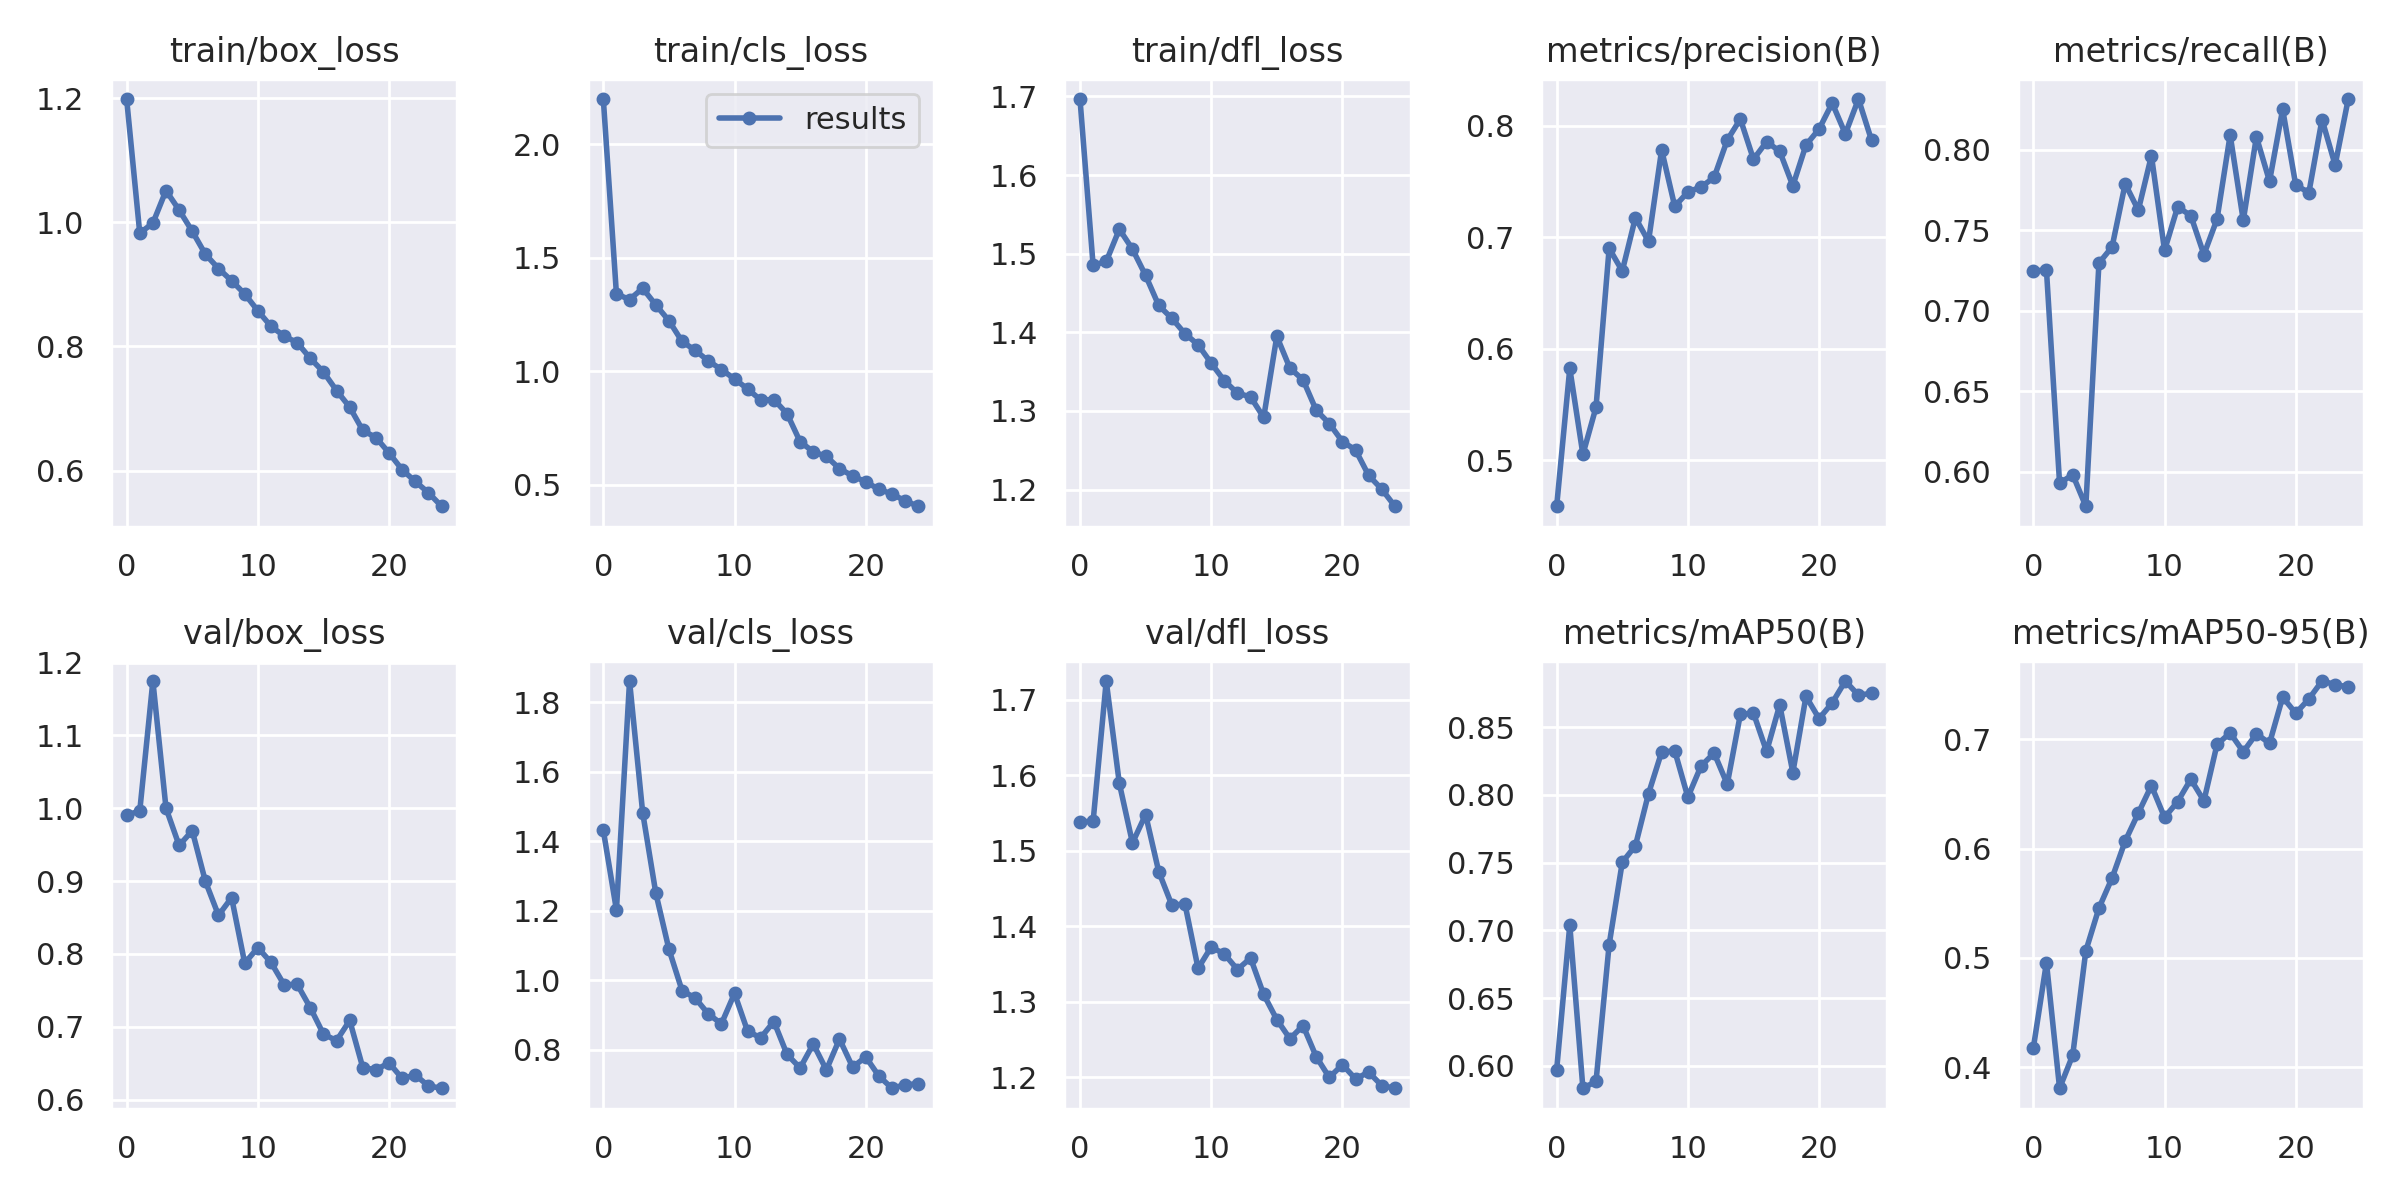

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content/drive/MyDrive/Phone_Yolov8


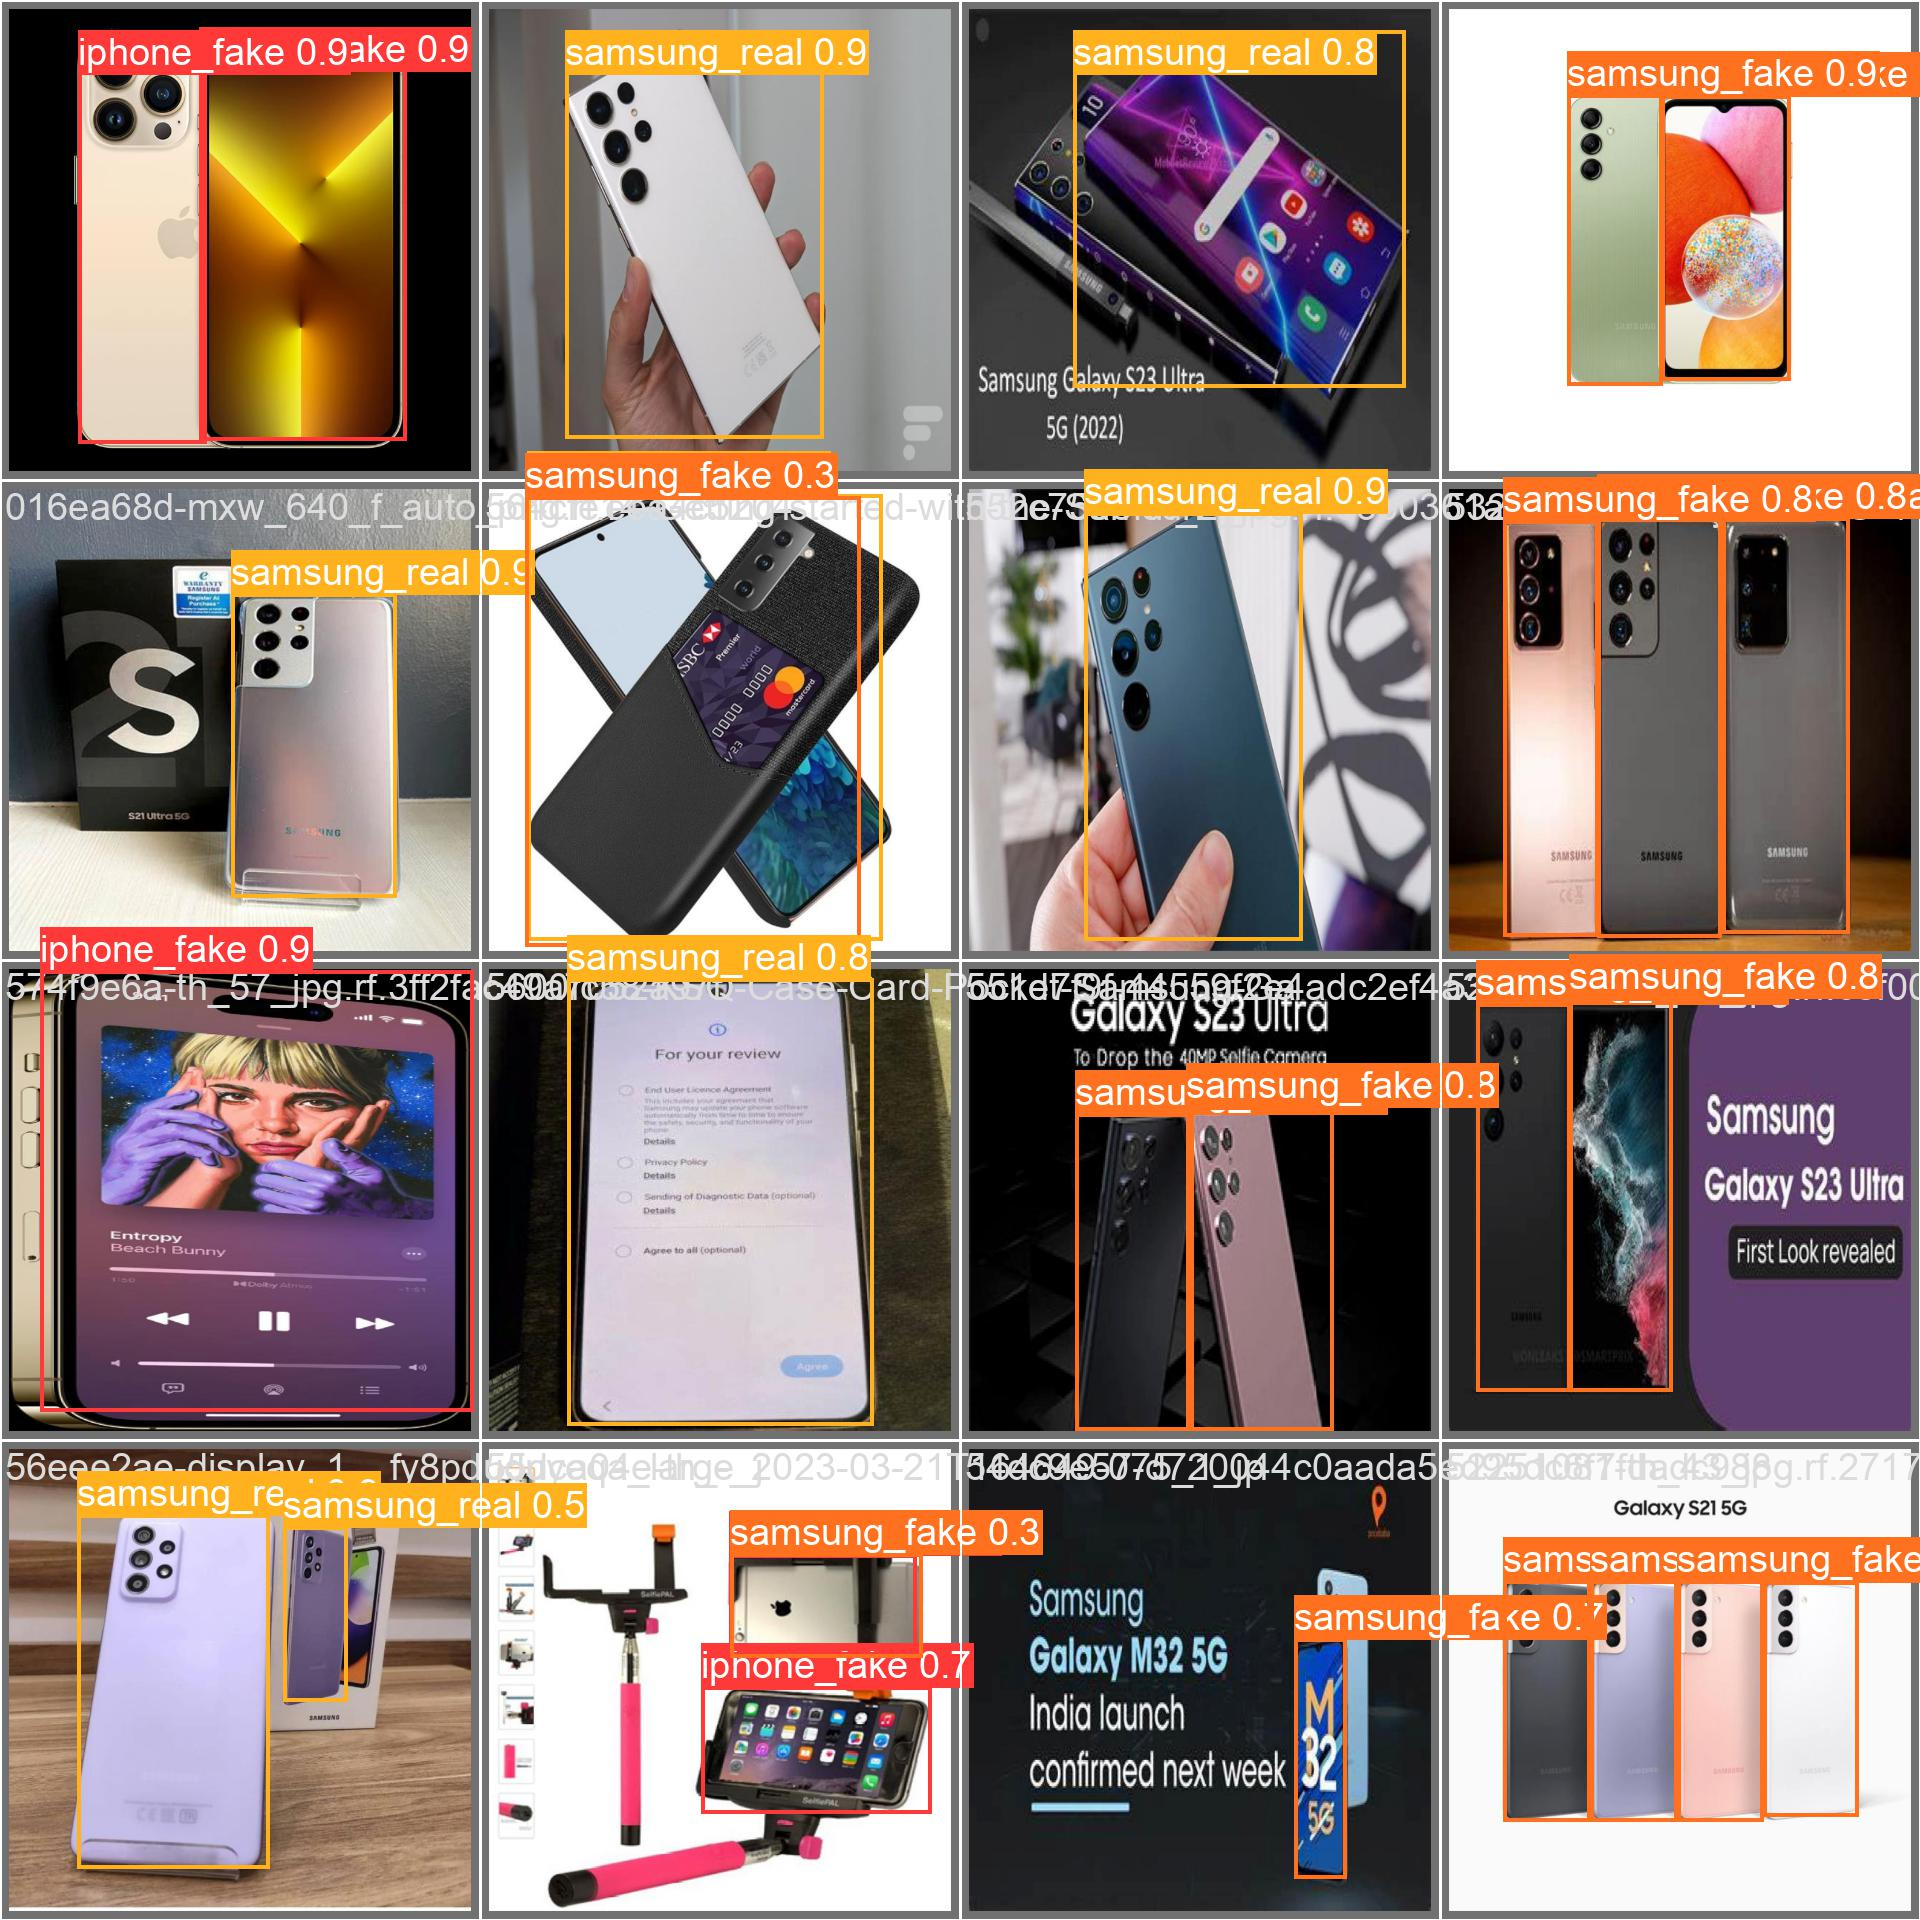

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/data.yaml

/content/drive/MyDrive/Phone_Yolov8
2023-05-20 09:36:21.868836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 09:36:22.731363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/valid/labels.cache... 310 images, 0 backgrounds, 0 corrupt: 100% 310/310 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:10<00:00,  1.83it/s]
                   all        310        475      0.795    

## Testing

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/test/images save=True line_thickness=5 

/content/drive/MyDrive/Phone_Yolov8
2023-05-20 09:38:06.513845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 09:38:07.383990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/159 /content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/test/images/031c4a78-s-l1600_png.rf.6ad7d0cd2c1ca19dc76e40727409e3b6.jpg: 800x800 3 samsung_fakes, 24.7ms
image 2/159 /content/drive/MyDrive/Phone_Yolov8/datasets/Merged_Dataset2-1/test/images/0520a696-6444518cv14d_jpg.rf.9be75503f6fa2ca2fe044a5b567af518.jpg: 800x800 1 samsung

## Video Testing

In [ ]:
!mkdir /content/drive/MyDrive/Phone_Yolov8/Video_test

mkdir: cannot create directory ‘/content/drive/MyDrive/Phone_Yolov8/Video_test’: File exists


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.30 source=/content/drive/MyDrive/Phone_Yolov8/Video_test/* save=True line_thickness=5 

/content/drive/MyDrive/Phone_Yolov8
2023-05-22 09:59:31.008945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 09:59:32.255247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
video 1/3 (1/1594) /content/drive/MyDrive/Phone_Yolov8/Video_test/testing_1.mp4: 480x800 63.6ms
video 1/3 (2/1594) /content/drive/MyDrive/Phone_Yolov8/Video_test/testing_1.mp4: 480x800 15.4ms
video 1/3 (3/1594) /content/drive/MyDrive/Phone_Yolov8/Video_test/testing_1.mp4: 480x800 1 iphone_original, 15.4ms
video 1/3 (4/1594) /content/drive/MyDrive/Phone_Yolov